# M5 T01: Algoritmes d'aprenentage supervisat: Classificació

Anem a practicar i a familiaritzar-nos amb algoritmes de classificació

## Nivell 1 - Exercici 1
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

_Llegim les dades que estan en format CSV, **DelayedFlights.csv**, per això necessitem carregar la llibreria **pandas**. Aprofitarem per a carregar altres llibreries que necessitarem més endevant_

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm 

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *

df = pd.read_csv('./../data/DelayedFlights.csv', index_col=0)

C:\Users\Nuria\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [74]:
df.shape

(1936758, 29)

In [75]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

_Com que el que volem és predir els endarreriments dels vols, crec que hem d'excloure del nostre conjunt de dades aquells vols que han estat cancel·lats i derivats_

In [76]:
df2 = df.loc[df.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]
df2.shape

(1928371, 29)

_Creem variable **FlightDelay**, que ens indicarà si el vol ha arribat tard o no_

In [77]:
df2['FlightDelay'] = (df2['ArrDelay'] > 0).astype(int)

In [78]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1


_Al conjunt de dades a part de la variable **ArrDelay** hi ha un seguit de variables que indiquen els minuts de retràs per motiu. Si bé aquest només s'especifica quan el retràs global és superior als 15 minuts. Per tant, si sumem els minuts d'aquestes cinc variables tindrem una variable que estarà molt correlacionada amb la variable **ArrDelay** i que podriem utilitzar per a classificar davant l'absència d'altres variables. Crearem la variable en minuts (**SumDelay**) i com a dummy (**Delay15**)_

In [79]:
df2['SumDelay'] = df2['CarrierDelay'] + df2['WeatherDelay'] + df2['NASDelay'] + df2['SecurityDelay'] + df2['LateAircraftDelay']

In [80]:
df2['SumDelay'] = df2['SumDelay'].replace(np.nan, 0)

In [81]:
df2['Delay15'] = (df2['SumDelay'] > 0).astype(int)

_La companyia WN era quina presentava més endarreriments, creem variable dummy que ens indiqui si la companyia és WN o no (vist en exercicis anteriors)_

In [82]:
df2['CarrierWN'] = (df2['UniqueCarrier'] == 'WN').astype(int)

_Eliminem del nostre conjunt de dades aquelles variables que segur no farem servir com l'any (tots són del mateix any) o els identificadors dels vols, les variables **Cancelled** i **Diverted** que també són redundants al ser les variables que hem utilitzat per filtrar_

In [83]:
df_ok = df2.drop(['Year','FlightNum','TailNum','Cancelled','CancellationCode','Diverted'], axis = 1)
df_ok.shape

(1928371, 27)

_La variable **FlightDelay** que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents._

In [84]:
X, y = df_ok.loc[:, df_ok.columns != 'FlightDelay'], df_ok.loc[:,'FlightDelay']
print(X.shape, y.shape)

(1928371, 26) (1928371,)


- Model 1 (DecisionTreeClassifier)

_Creem el subconjunt de dades X amb les variables explicatives seleccionades, variables que ja haviem utilitzat en altres models anteriorment ajustats per la seva correlació amb els retrasos_

In [85]:
X1 = X[['DepDelay', 'TaxiOut']]

_Creem arbre de decissió amb Scikit-learn_

In [86]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X1,y)

_(No m'ha sigut possible graficar l'arbre de decissió creat, l'exemple mostrat no s'executa)_

- Model 2 (LogisticRegression)

_Creem el subconjunt de dades X amb les variables explicatives seleccionades, variables que ja haviem utilitzat en altres models anteriorment_

In [87]:
X2 = X[['DepDelay','TaxiOut','Distance']]

_Ajustem el model de regressió logística_

In [88]:
logreg2 = LogisticRegression()
logreg2.fit(X2, y)

LogisticRegression()

- Model 3 (K-Nearest Neighbors)

_Creem el subconjunt de dades X amb les variables explicatives seleccionades, variables que ja haviem utilitzat en altres models anteriorment ajustats per la seva correlació amb els retrasos_

_Per evitar problemes amb l'escala de les dues variables, les estandaritzem_ 

In [89]:
X3 = X[['DepDelay', 'TaxiOut']]

scaler = StandardScaler()
scaler.fit(X3)

X3 = scaler.transform(X3)

_Ajustem el model K-Nearest Neighbors_

In [90]:
knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X3, y)

KNeighborsClassifier()

## Nivell 1 - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

- Model 1 (DecisionTreeClassifier)

_Primer de tot, calculem els valors predits_

In [91]:
y_clf1_pred = clf1.predict(X1)

_Calculem diferents estimadors per a comparar els models_

In [92]:
print("Accuracy:",metrics.accuracy_score(y, y_clf1_pred))

Accuracy: 0.8965764367956166


In [93]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_clf1_pred))

Confusion matrix:
[[  33041  171915]
 [  27524 1695891]]


In [94]:
conf1 = metrics.confusion_matrix(y, y_clf1_pred)
print("True positives:", conf1[1,1])
print("True negatives:", conf1[0,0])
print("False Positives:", conf1[0,1])
print("False Negatives:", conf1[1,0])

True positives: 1695891
True negatives: 33041
False Positives: 171915
False Negatives: 27524


In [95]:
print("Classification Error:")
print(1 - metrics.accuracy_score(y, y_clf1_pred))

Classification Error:
0.1034235632043834


In [96]:
print("Sensitivity:")
print(metrics.recall_score(y, y_clf1_pred))

Sensitivity:
0.9840293835205102


In [97]:
print("Specificity:")
print(conf1[0,0]/(conf1[0,0] + conf1[0,1]))

Specificity:
0.16121021097211108


- Model 2 (LogisticRegression)

_Primer de tot, calculem els valors predits_

In [98]:
y_logreg2_pred = logreg2.predict(X2)

_Calculem diferents estimadors per a comparar els models_

In [99]:
report2 = classification_report(y, y_logreg2_pred,digits=3,output_dict = True)

print("LogReg Model:")
print("Accuracy = {0:0.3f}".format(report2["accuracy"]))
print("Precision = {0:0.3f}".format(report2["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report2["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report2["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report2["1"]["f1-score"]))

LogReg Model:
Accuracy = 0.899
Precision = 0.911
Specificity = 0.190
Sensitivity = 0.983
F1-score = 0.945


In [100]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_logreg2_pred))

Confusion matrix:
[[  38986  165970]
 [  29541 1693874]]


In [101]:
conf2 = metrics.confusion_matrix(y, y_logreg2_pred)
print("True positives:", conf2[1,1])
print("True negatives:", conf2[0,0])
print("False Positives:", conf2[0,1])
print("False Negatives:", conf2[1,0])

True positives: 1693874
True negatives: 38986
False Positives: 165970
False Negatives: 29541


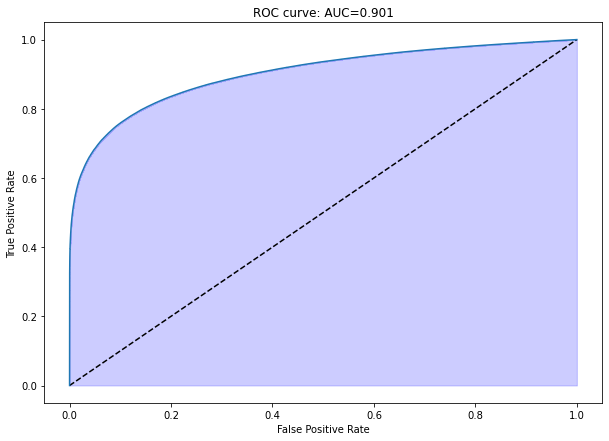

In [102]:
#Plotting the ROC curve

#generate predicted probabilites
y_logreg2_pred_prob = logreg2.predict_proba(X2)

#Generating points to plot on ROC curve (logistic model)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y, y_logreg2_pred_prob[:,1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y,y_logreg2_pred_prob[:,1])))
plt.show()

- Model 3 (K-Nearest Neighbors)

_Primer de tot calculem els valors predits_

In [103]:
y_knn3_pred = knn3.predict(X3)

_Calculem diferents estimadors per a comparar els models_

In [104]:
report3 = classification_report(y, y_knn3_pred,digits=3,output_dict = True)

print("K-Nearest Neighbors Model:")
print("Accuracy = {0:0.3f}".format(report3["accuracy"]))
print("Precision = {0:0.3f}".format(report3["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report3["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report3["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report3["1"]["f1-score"]))

K-Nearest Neighbors Model:
Accuracy = 0.885
Precision = 0.913
Specificity = 0.224
Sensitivity = 0.964
F1-score = 0.938


In [105]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_knn3_pred))

Confusion matrix:
[[  45882  159074]
 [  62172 1661243]]


In [106]:
conf3 = metrics.confusion_matrix(y, y_knn3_pred)
print("True positives:", conf3[1,1])
print("True negatives:", conf3[0,0])
print("False Positives:", conf3[0,1])
print("False Negatives:", conf3[1,0])

True positives: 1661243
True negatives: 45882
False Positives: 159074
False Negatives: 62172


_Tots tres models tenen una **accuracy** (% prediccions correctes) i una **sensivility** (probabilitat de classificar correctament els vols retrassats) molt alta, en canvi una **specificity** (probabilitat de classificar correctament a un vol no retrassat) molt baixa. Quan en realitat ens interessaria tenir aquests tres paràmetres el més alts possibles_

_Dels tres models, i fixant-nos en els valors de **accuracy** i **sensivility**, escolliriem el model 2 de regressió logística, donat que té els valors més alts_

## Nivell 1 - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

_Dividim els conjunts de dades en Train i Test, farem que Train tingui el 67% de les observacions i Test el 33% restant, amb la instrucció shape ho revisarem_

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1292008, 26) (636363, 26) (1292008,) (636363,)


_Entrenem els models_

- Model 1 (DecisionTreeClassifier)

In [108]:
X_train1 = X_train[['DepDelay', 'TaxiOut']]

In [109]:
clf_train1 = DecisionTreeClassifier()
clf_train1 = clf_train1.fit(X_train1,y_train)

- Model 2 (LogisticRegression)

In [110]:
X_train2 = X_train[['DepDelay','TaxiOut','Distance']]

In [111]:
logreg_train2 = LogisticRegression()
logreg_train2.fit(X_train2, y_train)

LogisticRegression()

- Model 3 (K-Nearest Neighbors)

In [112]:
X_train3 = X_train[['DepDelay', 'TaxiOut']]

scaler = StandardScaler()
scaler.fit(X_train3)

X_train3 = scaler.transform(X_train3)

In [113]:
knn_train3 = KNeighborsClassifier(n_neighbors=5)
knn_train3.fit(X_train3, y_train)

KNeighborsClassifier()

## Nivell 1 - Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

- Model 1 (DecisionTreeClassifier)

In [114]:
X_test1 = X_test[['DepDelay', 'TaxiOut']]

In [115]:
y_clf_train1_pred = clf_train1.predict(X_test1)

In [116]:
report1t = classification_report(y_test, y_clf_train1_pred,digits=3,output_dict = True)

print("Decision TreeClassifier Model:")
print("Accuracy = {0:0.3f}".format(report1t["accuracy"]))
print("Precision = {0:0.3f}".format(report1t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report1t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report1t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report1t["1"]["f1-score"]))

Decision TreeClassifier Model:
Accuracy = 0.897
Precision = 0.907
Specificity = 0.156
Sensitivity = 0.985
F1-score = 0.944


In [117]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_clf_train1_pred))

Confusion matrix:
[[ 10564  57098]
 [  8730 559971]]


- Model 2 (LogisticRegression)

In [118]:
X_test2 = X_test[['DepDelay','TaxiOut','Distance']]

In [119]:
y_logreg_train2_pred = logreg_train2.predict(X_test2)

In [120]:
report2t = classification_report(y_test, y_logreg_train2_pred,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(report2t["accuracy"]))
print("Precision = {0:0.3f}".format(report2t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report2t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report2t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report2t["1"]["f1-score"]))

Logistic Regression Model:
Accuracy = 0.898
Precision = 0.911
Specificity = 0.190
Sensitivity = 0.983
F1-score = 0.945


In [121]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_logreg_train2_pred))

Confusion matrix:
[[ 12830  54832]
 [  9783 558918]]


- Model 3 (K-Nearest Neighbors)

In [122]:
X_test3 = X_test[['DepDelay', 'TaxiOut']]

scaler = StandardScaler()
scaler.fit(X_test3)

X_test3 = scaler.transform(X_test3)

In [123]:
y_knn_train3_pred = knn_train3.predict(X_test3)

In [124]:
report3t = classification_report(y_test, y_knn_train3_pred,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(report3t["accuracy"]))
print("Precision = {0:0.3f}".format(report3t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report3t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report3t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report3t["1"]["f1-score"]))

Logistic Regression Model:
Accuracy = 0.883
Precision = 0.914
Specificity = 0.243
Sensitivity = 0.960
F1-score = 0.936


In [125]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_knn_train3_pred))

Confusion matrix:
[[ 16456  51206]
 [ 22972 545729]]


## Nivell 2 - Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

_Partim del model 2 vist anteriorment i afegim una variable dummy que indica si la companyia era WN o no._

In [127]:
X_train5 = X_train[['DepDelay','TaxiOut','Distance','CarrierWN']]

_Ajustem el model:_

In [128]:
logreg_train5 = LogisticRegression()
logreg_train5.fit(X_train5, y_train)

LogisticRegression()

_Calculem els valors predits:_

In [129]:
X_test5 = X_test[['DepDelay','TaxiOut','Distance','CarrierWN']]

In [130]:
y_logreg_train5_pred = logreg_train5.predict(X_test5)

_Avaluem el model:_

In [131]:
report5t = classification_report(y_test, y_logreg_train5_pred,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(report5t["accuracy"]))
print("Precision = {0:0.3f}".format(report5t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report5t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report5t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report5t["1"]["f1-score"]))

Logistic Regression Model:
Accuracy = 0.898
Precision = 0.911
Specificity = 0.189
Sensitivity = 0.982
F1-score = 0.945


In [132]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_logreg_train5_pred))

Confusion matrix:
[[ 12801  54861]
 [ 10006 558695]]


_Al afegir la variable dummy **CarrierWN** no es que haguem millorat el model. De la mateixa manera que al afegir transformacions de les variables, com el logaritme de la variable TaxiOut (variable transformada al logaritme per la relació que presentava la variable amb ArrDelay)_

## Nivell 3 - Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

_Ja haviem vist la forta relació lineal entre les variables ArrDelay i DepDelay. Anem a veure la correlació entre les variables numèriques del nostre conjunt de dades. On inclourem la variable creada com la suma dels minuts per tipus de retràs (**SumDelay**)_

In [134]:
dfNUM = df2.loc[:,['ArrDelay','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut','SumDelay']]

In [135]:
corrMatrix = dfNUM.corr()
print (corrMatrix)

                   ArrDelay  ActualElapsedTime  CRSElapsedTime   AirTime  \
ArrDelay           1.000000           0.068130       -0.015676 -0.000189   
ActualElapsedTime  0.068130           1.000000        0.971122  0.976660   
CRSElapsedTime    -0.015676           0.971122        1.000000  0.986086   
AirTime           -0.000189           0.976660        0.986086  1.000000   
DepDelay           0.952927           0.018492        0.006835 -0.002753   
Distance          -0.029853           0.952980        0.981967  0.980294   
TaxiIn             0.156277           0.166348        0.099693  0.083926   
TaxiOut            0.286484           0.289568        0.123454  0.090398   
SumDelay           0.996307           0.077939       -0.003269  0.009790   

                   DepDelay  Distance    TaxiIn   TaxiOut  SumDelay  
ArrDelay           0.952927 -0.029853  0.156277  0.286484  0.996307  
ActualElapsedTime  0.018492  0.952980  0.166348  0.289568  0.077939  
CRSElapsedTime     0.006835  

_La variable creada **SumDelay** està fortament correlacionada amb la variable **ArrDelay** i **DepDelay**. Ajustarem el mateix model de l'exercici 5, però en lloc de fer servir la variable **DepDelay** farem servir la variable **SumDelay**_

In [136]:
X_train6 = X_train[['SumDelay','TaxiOut','Distance','CarrierWN']]

_Ajustem el model:_

In [137]:
logreg_train6 = LogisticRegression()
logreg_train6.fit(X_train6, y_train)

LogisticRegression()

_Calculem els valors predits:_

In [138]:
X_test6 = X_test[['SumDelay','TaxiOut','Distance','CarrierWN']]

In [139]:
y_logreg_train6_pred = logreg_train6.predict(X_test6)

_Avaluem el model:_

In [140]:
report6t = classification_report(y_test, y_logreg_train6_pred,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(report6t["accuracy"]))
print("Precision = {0:0.3f}".format(report6t["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report6t["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report6t["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report6t["1"]["f1-score"]))

Logistic Regression Model:
Accuracy = 0.894
Precision = 0.903
Specificity = 0.103
Sensitivity = 0.989
F1-score = 0.944


In [141]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_logreg_train6_pred))

Confusion matrix:
[[  6993  60669]
 [  6512 562189]]


_Utilitzant la variable **SumDelay** enlloc de la variable **DepDelay**, obtenim un bon model. Ara bé, discutible que sigui millor que l'anterior, donat que Sensivility ha augmentat lleugerament i la Accuracy ha disminuit una mica_